In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (Condition on trial type)
#### Load data and check data head
##### Use all.csv

In [7]:
# Load data from csv file into a NumPy structured array
data2C = hddm.load_csv('./rt_dataframes/all.csv')
data2C.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [8]:
data2C = data2C.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})

data2C['rt'] = data2C['rt'] / 1000
data2C.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


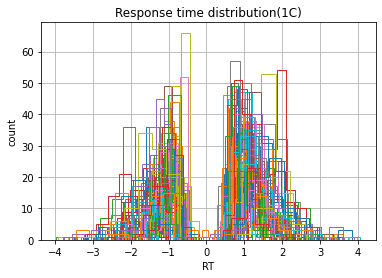

In [9]:
#flip the error RTs to be negative
data2C = hddm.utils.flip_errors(data2C)
# plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(1C)')
for i, subj_data in data2C.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(1C).png')

## Fitting the hierarchical model for one condition with no subject effects

In [10]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(data2C, depends_on={'v': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname=f'./fitting_results/HDDM/HDDM2C/traces2c(v_trial).db', db='pickle')
m.save(f'./fitting_results/HDDM/HDDM2C/HDDM2C(v_trial)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1862.7 sec

In [2]:
m = hddm.load(f'./fitting_results/HDDM/HDDM2C/HDDM2C(v_trial)')

Plotting a
Plotting a_std
Plotting v(101)
Plotting v(102)
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


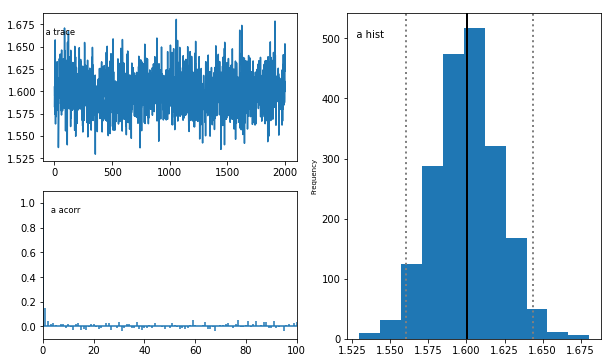

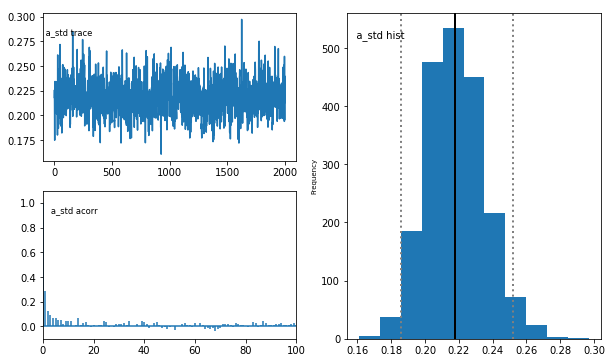

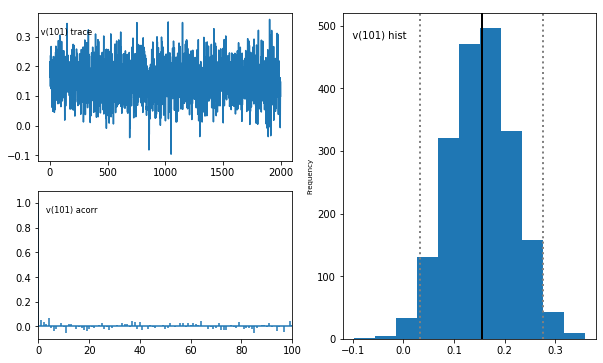

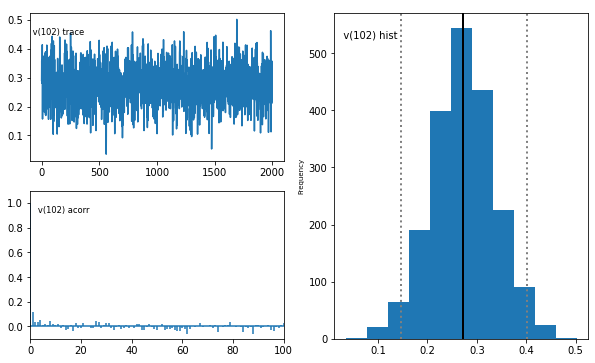

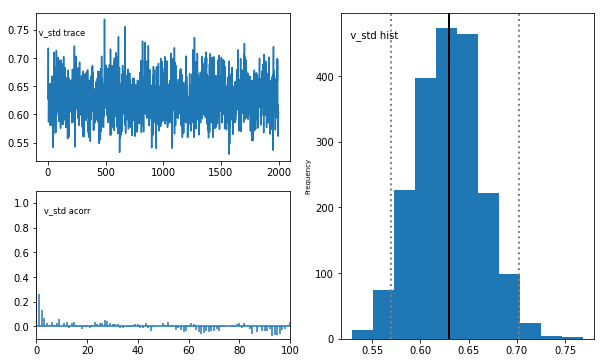

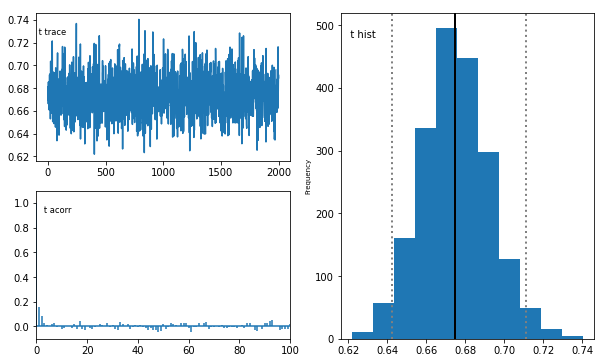

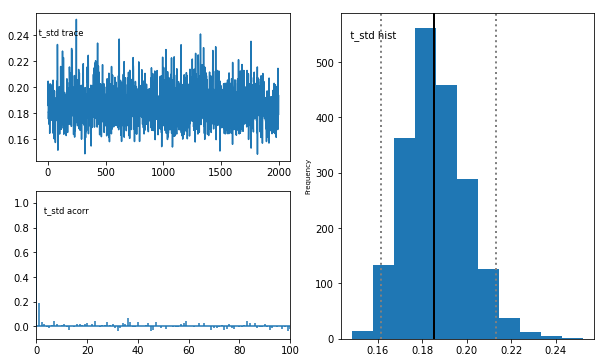

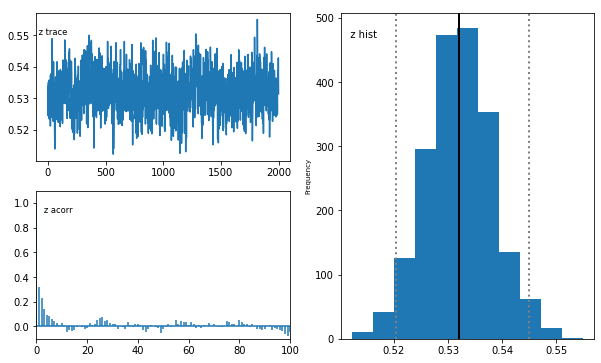

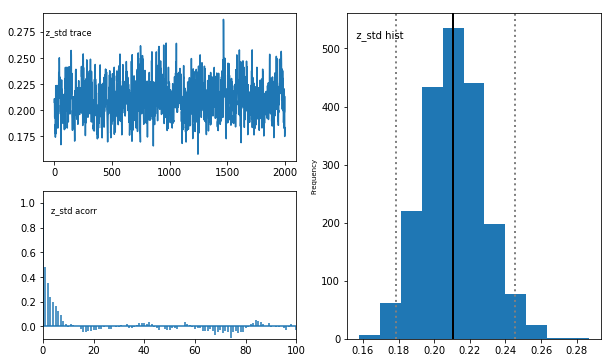

In [12]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [13]:
stats2Cv = m.gen_stats()
stats2Cv.to_csv('./fitting_results/HDDM/HDDM2C/HDDM2Cv.csv', sep=',')
stats2Cv[stats2Cv.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.60027,0.0214414,1.55947,1.58585,1.60027,1.6139,1.64357,0.000608616
a_std,0.21793,0.0172418,0.186632,0.20576,0.217436,0.229199,0.252716,0.000605795
v_std,0.629931,0.0339887,0.566398,0.604849,0.629876,0.653519,0.699408,0.00110927
t,0.674961,0.0174536,0.64096,0.663444,0.674529,0.68638,0.71041,0.00048078
t_std,0.186251,0.0138145,0.162725,0.176676,0.185144,0.194785,0.21551,0.000394465
z,0.532117,0.00611504,0.519777,0.528066,0.532073,0.536102,0.544703,0.00021368
z_std,0.211071,0.0171277,0.17967,0.19939,0.210458,0.222432,0.247202,0.000746137


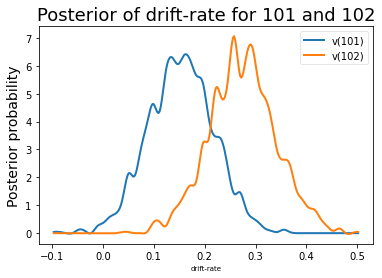

In [14]:
v_101, v_102 = m.nodes_db.node[['v(101)', 'v(102)']]
hddm.analyze.plot_posterior_nodes([v_101, v_102])
plt.xlabel('drift-rate', fontsize=7)
plt.ylabel('Posterior probability', fontsize=14)
plt.title('Posterior of drift-rate for 101 and 102', fontsize=18)
plt.savefig('./fitting_results/HDDM/HDDM2C/posterior_v(101,102).png')

In [3]:
m.dic

31477.509962289445

## Check for Model convergence

In [15]:
# Set up models list to append results
models2Cv = list()

In [16]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,depends_on={'v': 'trial_type'},include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=100, dbname = f'./fitting_results/HDDM/HDDM2C/chain2Cv_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C/chain2CvCON_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [17]:
num_chains = 5
data_chains = [(data2C,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2Cv = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 4
Fitting chain 3
Fitting chain 1Fitting chain 0Fitting chain 2




/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------98%----------------- ] 2942 of 3000 complete in 1937.6 sec               0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 3 of 3000 complete in 1.3 sec[                  0%                  ] 3 of 3000 complete in 1.3 sec  [                  0%                  ] 3 of 3000 complete in 1.3 sec[                  0%                  ] 3 of 3000 complete in 1.3 sec[                  0%                  ] 3 of 3000 complete in 1.3 sec[                  0%                  ] 4 of 3000 complete in 1.9 sec[                  0%                  ] 4 of 3000 complete in 1.9 sec[                  0%                  ] 4 of 3000 complete in 1.9 sec[                  0%                  ] 4 of 3000 complete in 1.9 sec[                  0%                  ] 4 of 3000 complete in 1.9 sec[               

In [18]:
models2Cv

In [19]:
results = hddm.analyze.gelman_rubin(models2Cv)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0001004879042945
a_std: 1.0011313808735092
a_subj.00aa64fdcb675341: 1.0001074579886537
a_subj.02535fcf7e16bb56: 1.0022326791996186
a_subj.06c46b112368babf: 1.0004586407147558
a_subj.09ba82a2ca814481: 1.0001383740358094
a_subj.0abfc32a4d12c731: 1.000172293581342
a_subj.0b0a94c202d0b233: 1.0010191593140583
a_subj.0beac20378edac7b: 0.9999354473405768
a_subj.0d894551bc966608: 0.9999682950345435
a_subj.10d15198ac61a404: 1.0006183471703862
a_subj.12a096342c4d052f: 1.0002542309221403
a_subj.13e347e32a454872: 0.9999935087086269
a_subj.15e0c065b2c11595: 1.0004761152628328
a_subj.163b12703c8e5c3c: 1.0008425791770004
a_subj.1bf86ff948486447: 1.0000670280692683
a_subj.1cb976bac3a2016b: 1.0005329262792366
a_subj.1ffdcfc59b83c43a: 1.0002310958351461
a_subj.221e9f16c114b2c0: 1.0003860719559745
a_subj.22d84796012679e8: 1.0011277694400922
a_subj.247384e4eccc4f80: 0.9999432178356751
a_subj.2737c4b829b3018f: 1.00011982960903
a_subj.27902f23b60a7b76: 1.000251210914577
a_subj.279cd1540fc8f71f: 1.00018

In [20]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


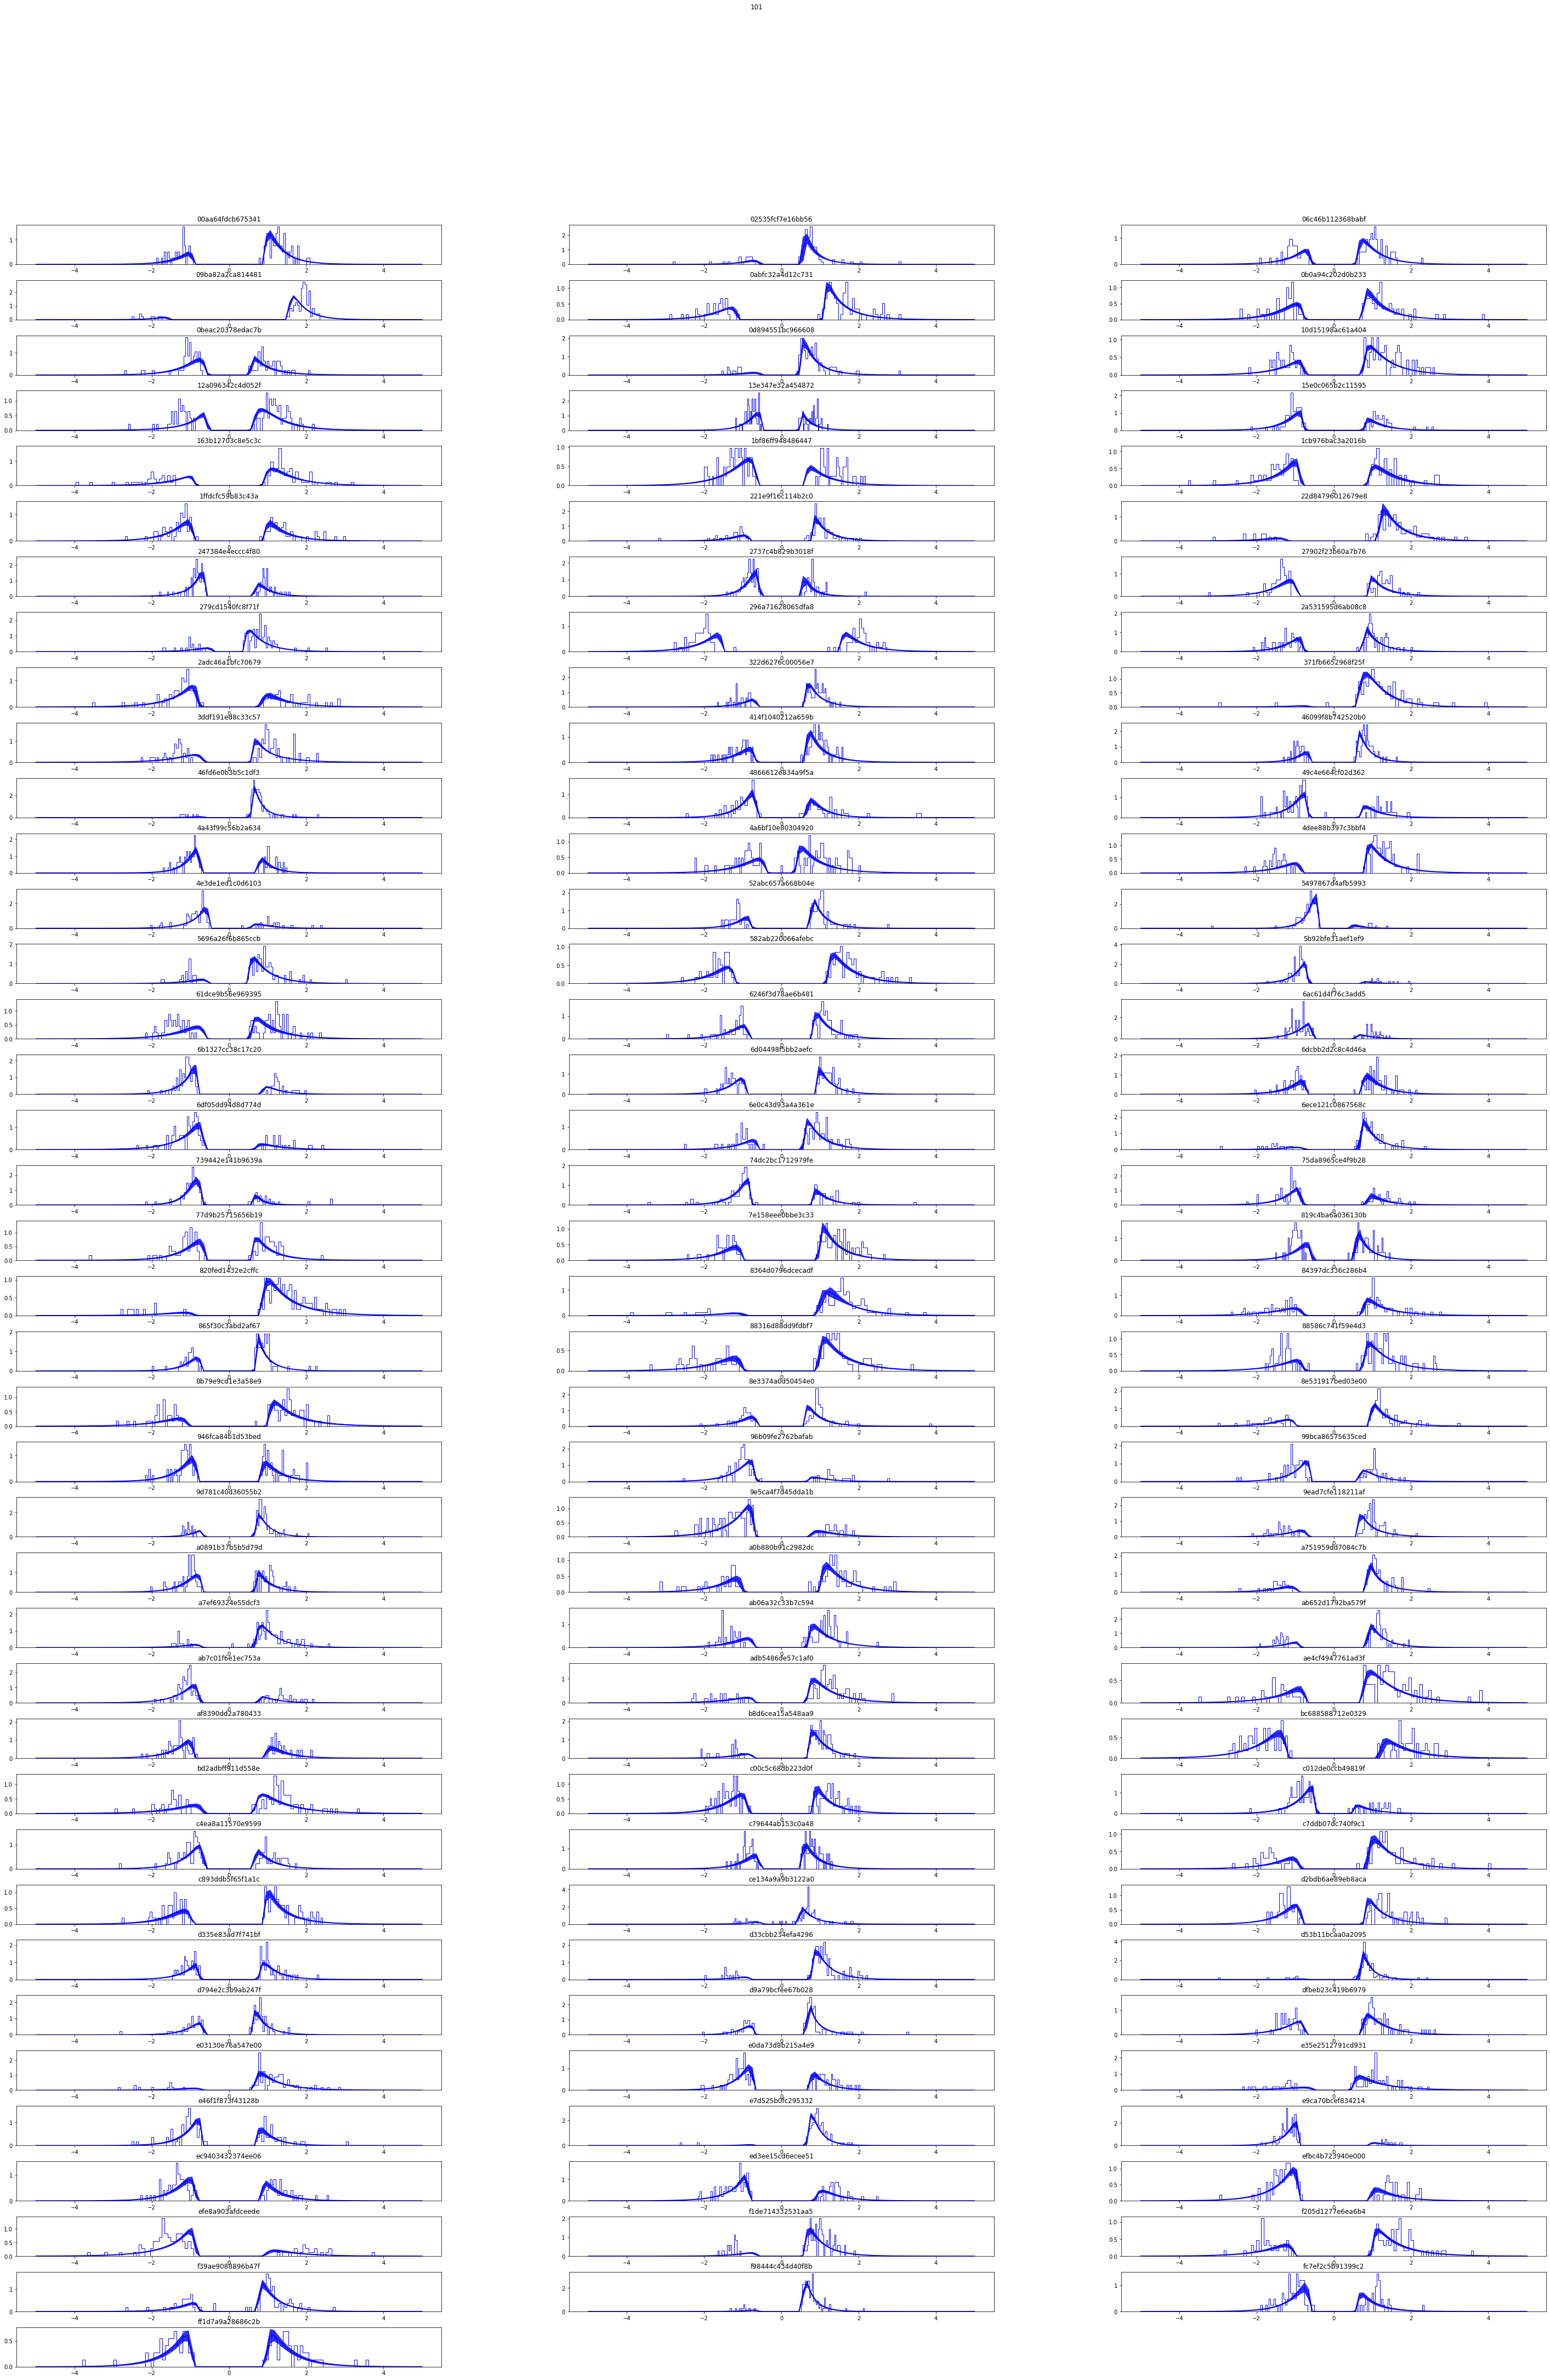

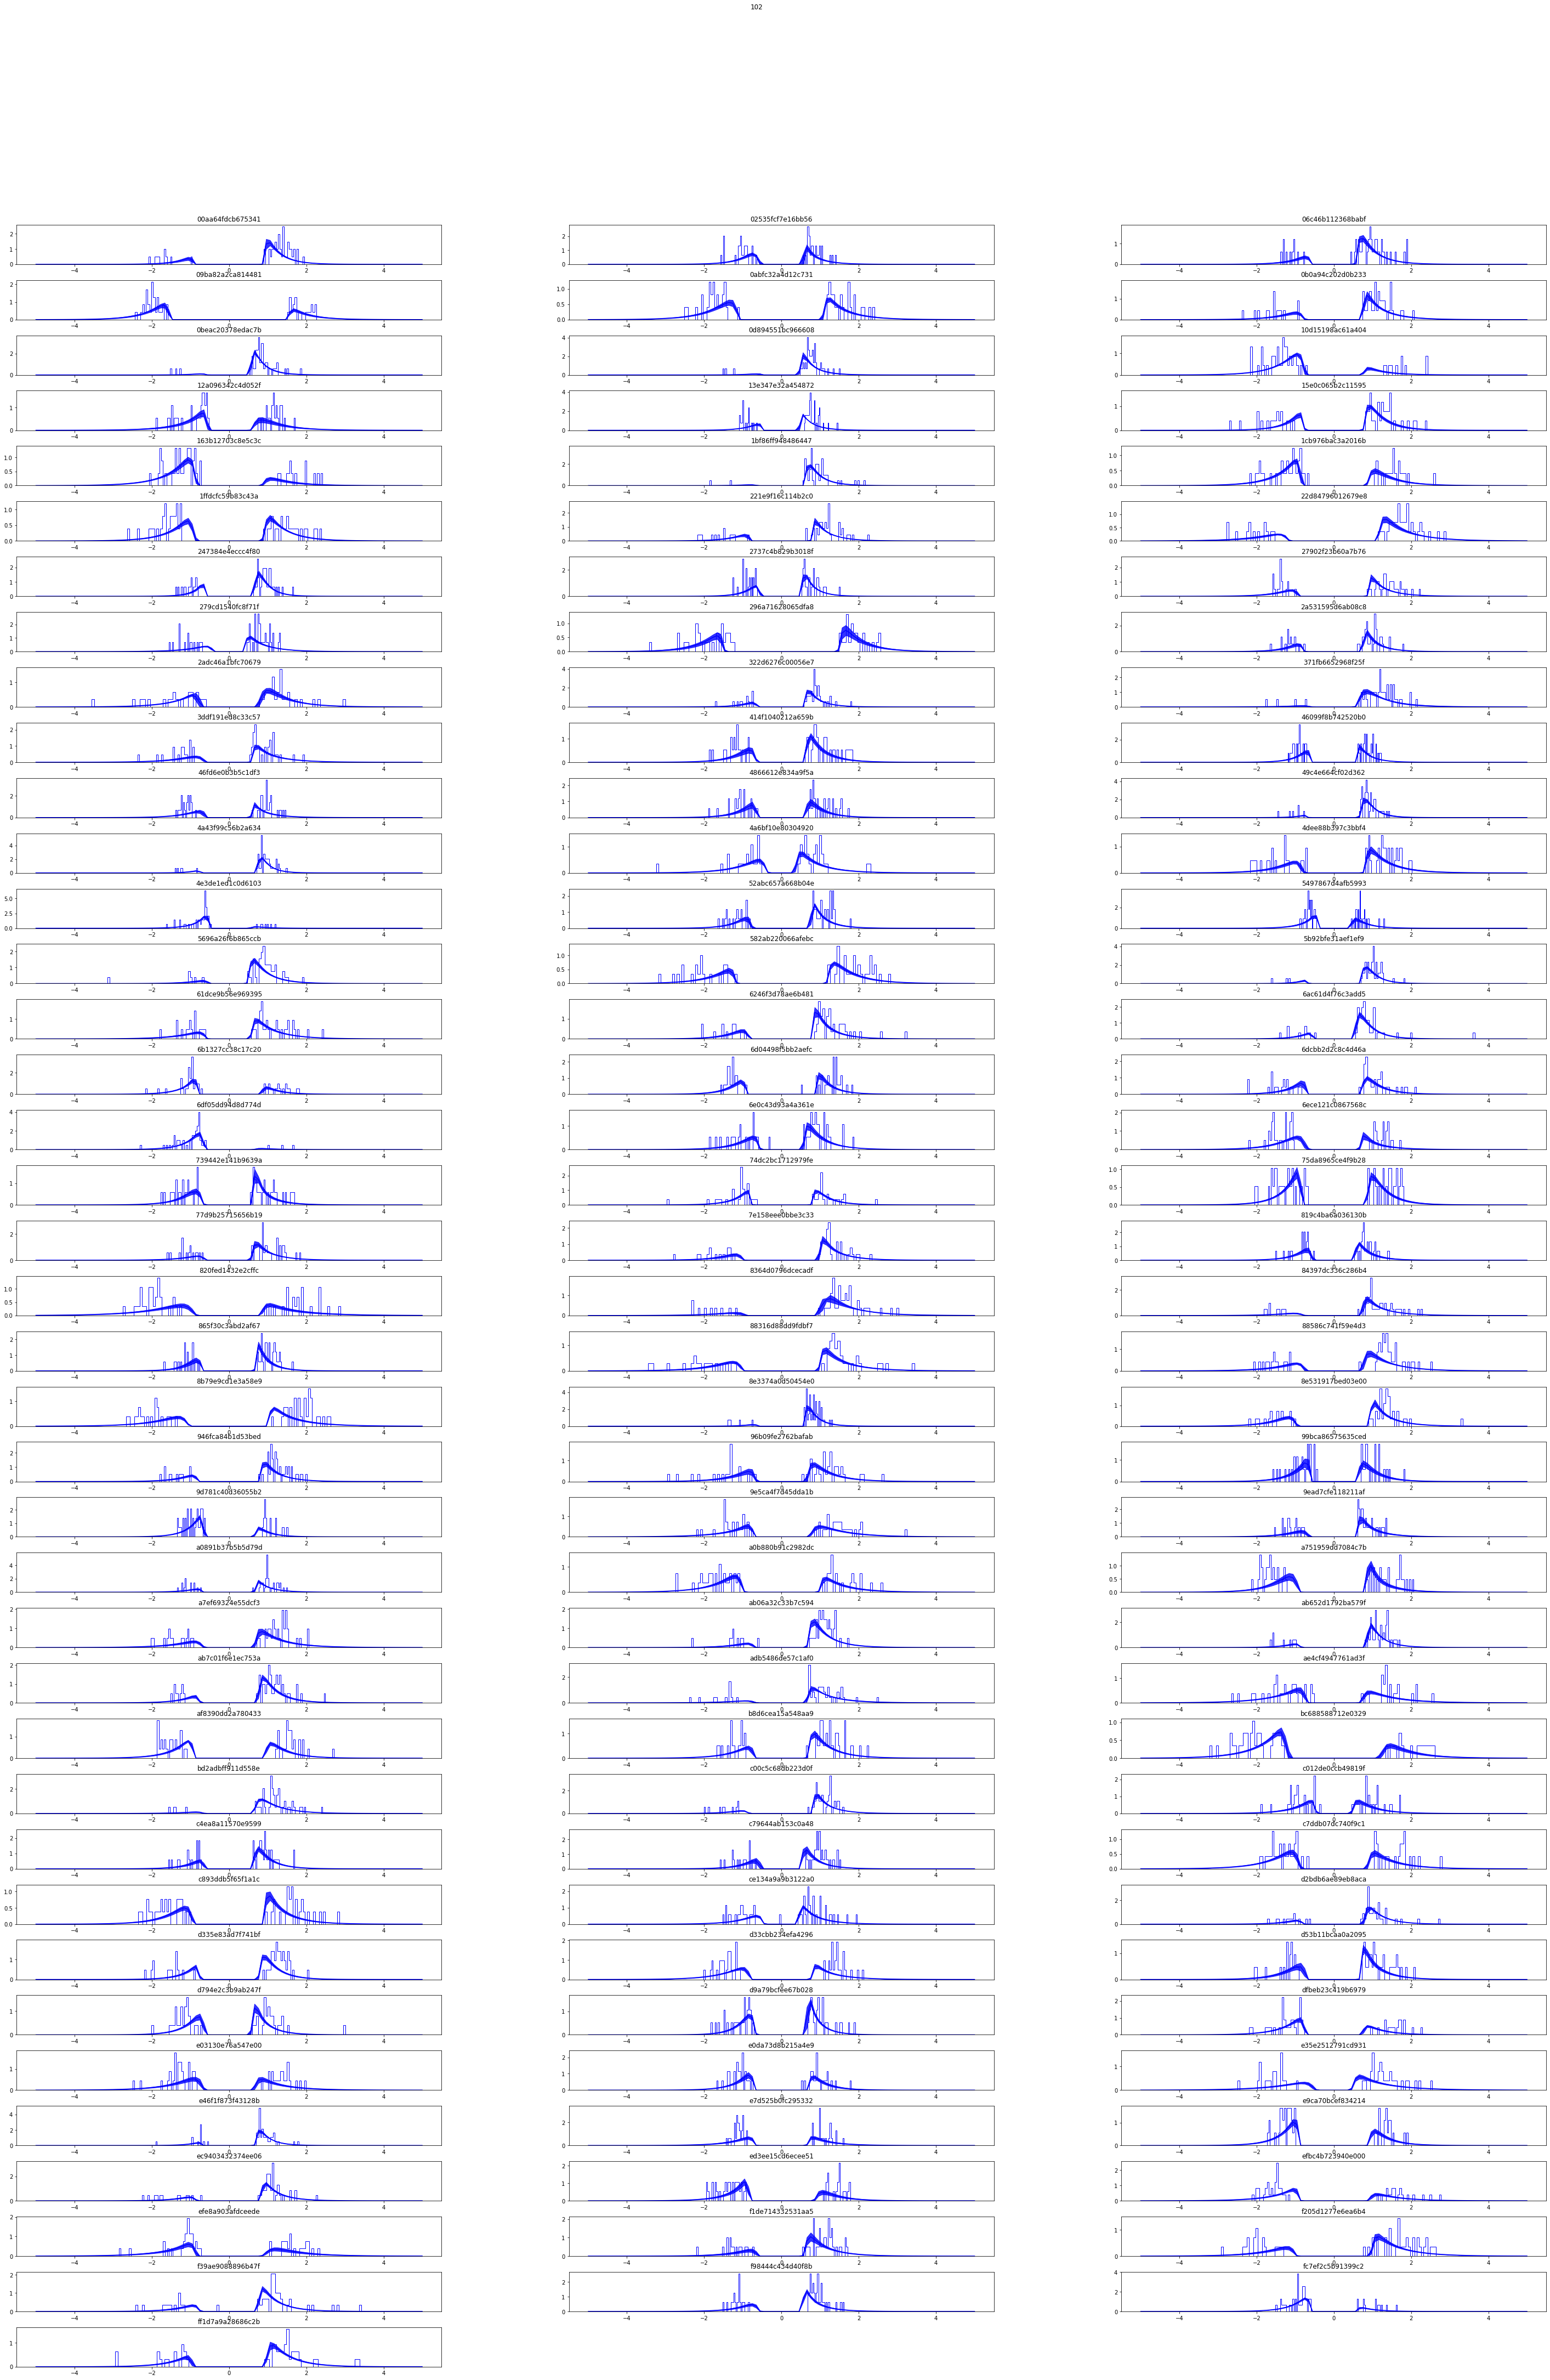

In [21]:
m.plot_posterior_predictive(figsize=(50, 70))